In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DatosfiltradosII.csv to DatosfiltradosII.csv


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['DatosfiltradosII.csv']))

In [ ]:
data=df2
data=data.drop(columns=['Cod.Car.Sec','Unnamed: 0','Nota.Final'])


In [ ]:
data['Anho.Firma']=np.where(data['Anho.Firma']>0,1,data['Anho.Firma'])
#for x in range(1897):
 #   data['Nota.Final'].values[x]= str(data['Nota.Final'].values[x]).split(",")[-1].split("-")[-1]
#data['Nota.Final']=np.where(data['Nota.Final']=='nan',0,data['Nota.Final'])
#data['Nota.Final']=data['Nota.Final'].apply(pd.to_numeric) 

In [ ]:
data_train, data_test, labels_train, labels_test = train_test_split(data.drop('Aprobado',axis=1),data['Aprobado'],test_size=0.2)

In [ ]:
data_train.shape

(1517, 6)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Build the model
model = Sequential()
model.add(Dense(15, activation='linear' , input_shape=(6,), name = "Capa_de_Entrada"))
model.add(Dense(5, activation='tanh'   , name = "Capa_de_Oculta0"))
model.add(Dense(5, activation='relu'   , name = "Capa_de_Oculta"))
model.add(Dense(2, activation='sigmoid', name = "Capa_de_Salida"))
model.add(Dense(1, activation='softmax'   , name = "Capa_de_Ocultaii"))



In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Capa_de_Entrada (Dense)      (None, 15)                105       
_________________________________________________________________
Capa_de_Oculta0 (Dense)      (None, 5)                 80        
_________________________________________________________________
Capa_de_Oculta (Dense)       (None, 5)                 30        
_________________________________________________________________
Capa_de_Salida (Dense)       (None, 2)                 12        
_________________________________________________________________
Capa_de_Ocultaii (Dense)     (None, 1)                 3         
Total params: 230
Trainable params: 230
Non-trainable params: 0
_________________________________________________________________


Epoch 1/1000
38/38 [==============================] - 1s 7ms/step - loss: 0.6445 - val_loss: 0.5610
Epoch 2/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.5877 - val_loss: 0.5451
Epoch 3/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.5821 - val_loss: 0.5324
Epoch 4/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.5701 - val_loss: 0.5214
Epoch 5/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.5433 - val_loss: 0.5132
Epoch 6/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.5494 - val_loss: 0.5030
Epoch 7/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.5285 - val_loss: 0.4941
Epoch 8/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.5516 - val_loss: 0.4865
Epoch 9/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.5103 - val_loss: 0.4822
Epoch 10/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.5217 - val_loss: 0.4773

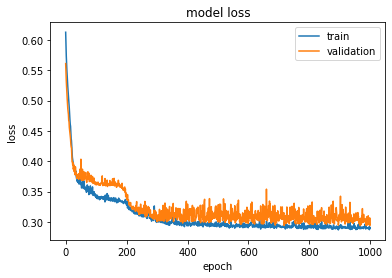

In [ ]:
history = model.fit(data_train, labels_train, epochs=1000, batch_size=32, verbose=1, validation_split=0.2)
model.summary()
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
print(model.evaluate(data.drop('Aprobado',axis=1),data['Aprobado']))
print(model.metrics_names)
predictions = model.predict(data_test)


60/60 [==============================] - 0s 1ms/step - loss: 0.2971
0.2970607876777649
['loss']


In [ ]:

from sklearn.metrics import confusion_matrix
#y_pred=LogReg.predict(X_test)
confusion_matrix = confusion_matrix(labels_test, predictions)
print(confusion_matrix)



[[  0 235]
 [  0 145]]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report  

predict_label = predictions.reshape(-1).round()

print('Cantidad de predicciones = {} \n'.format(predict_label.shape))

cf_matrix = confusion_matrix(labels_test, predict_label)
print(cf_matrix)

Cantidad de predicciones = (380,) 

[[  0 235]
 [  0 145]]
